In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

# 1943 MCP 뉴런

In [2]:
x = np.array([0.1, 0.2])

In [3]:
w = np.array([0.3, 0.4])

In [4]:
b = -0.3

In [5]:
z = np.dot(x, w) + b
z

-0.18999999999999997

In [6]:
y = 1 if z > 0 else -1

In [7]:
y

-1

MCP 뉴런 논리회로 

In [8]:
def 취합(x, w, b):
    z = np.dot(x, w) + b
    return z

In [9]:
def 활성화(z):
    y = 1 if z > 0 else -1
    return y

In [10]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    # MCP 뉴런
    z = 취합(x, w, b)
    y = 활성화(z)
    y = 0 if y == -1 else y
    return y

In [11]:
def test(logic):
    for x1, x2 in [(0,0), (0,1), (1,0), (1,1)]:
        y = logic(x1, x2)
        print(x1, x2, '|', y)

In [12]:
test(AND)

0 0 | 0
0 1 | 0
1 0 | 0
1 1 | 1


In [13]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    # MCP 뉴런
    z = 취합(x, w, b)
    y = 활성화(z)
    y = 0 if y == -1 else y
    return y

In [14]:
test(OR)

0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 1


In [15]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    # MCP 뉴런
    z = 취합(x, w, b)
    y = 활성화(z)
    y = 0 if y == -1 else y
    return y

In [16]:
test(NAND)

0 0 | 1
0 1 | 1
1 0 | 1
1 1 | 0


# 1958 퍼셉트론

인공지능의 탄생

In [52]:
class 뉴런:
    def __init__(self, w, b):
        self.w = w
        self.b = b
        
    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        y = np.where(z > 0, 1, -1)
        return y

In [53]:
w = np.array([0.5, 0.5])
b = -0.7

AND뉴런 = 뉴런(w, b)

In [54]:
test(lambda x1, x2: AND뉴런.predict(np.array([x1, x2])))

0 0 | -1
0 1 | -1
1 0 | -1
1 1 | 1


In [55]:
class 퍼셉트론(뉴런):
    def __init__(self):
        뉴런.__init__(self, w=None, b=None)
        
    def fit(self, X, y, 학습횟수, 학습률):
        """학습"""
        # 가중치 초기화
        특징수 = X.shape[1]
        self.w = np.zeros(특징수)
        self.b = 0.
        # 학습
        error_history = []
        for i in range(학습횟수):            
            종합오류 = 0
            for xi, yi in zip(X, y): # 각 샘플에 대해 ...
                yi_pred = self.predict(xi)
                error = yi - yi_pred
                종합오류 += error**2
                # 가중치 갱신
                delta = error * 학습률
                self.w += delta * xi
                self.b += delta
            error_history.append(종합오류)
        return error_history

In [56]:
iris = pd.read_csv('data/iris.data', header=None)

In [57]:
data = iris[:100]

In [58]:
y = data[4]
X = data.iloc[:, 0:4].values.astype('float32')

In [73]:
data.iloc[:, 0:4].values.dtype

dtype('float64')

In [59]:
y = np.where(y == 'Iris-setosa', 1, -1)

In [60]:
np.unique(y)

array([-1,  1])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [62]:
model = 퍼셉트론()

In [63]:
error_history = model.fit(X_train, y_train, 
                          학습횟수=10, 학습률=0.01)

In [64]:
model.w, model.b

(array([ 0.02999998,  0.134     , -0.166     , -0.06      ]), 0.02)

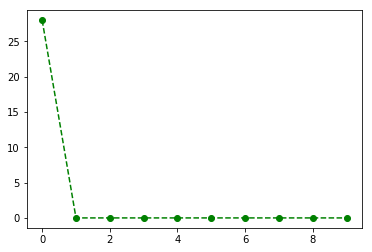

In [65]:
plt.plot(error_history, color='g', marker='o', linestyle='--')

In [66]:
y_pred = model.predict(X_test)

In [68]:
np.mean(y_pred == y_test)

1.0

#### 연습

아래 주어진 데이터에 대해 퍼셉트론을 훈련하고 평가해 봅시다.

*생각해 볼 점*

학습횟수와 학습률을 어떻게 설정해야 할까요?

In [69]:
data2 = iris[50:]

In [70]:
len(data2)

100

In [74]:
y = data2[4]

In [76]:
y = np.where(y == 'Iris-versicolor', 1, -1)

In [77]:
X = data2.iloc[:, 0:4].values.astype('float32')

In [78]:
X.shape

(100, 4)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [80]:
model = 퍼셉트론()

In [82]:
error_history = model.fit(X_train, y_train, 
                          학습횟수=10, 학습률=0.01)

In [83]:
model.w, model.b

(array([ 0.5659999 ,  0.36599996, -0.79600012, -0.6859999 ]),
 0.25999999999999995)

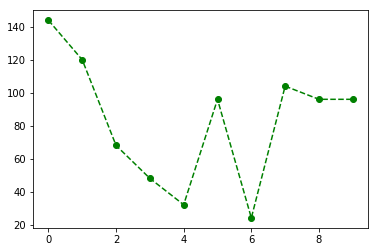

In [84]:
plt.plot(error_history, 'go--')

In [85]:
y_pred = model.predict(X_test)

In [86]:
np.mean(y_pred == y_test)

0.95999999999999996

In [90]:
data[:3]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [91]:
y1 = np.where(data[4] == 'Iris-setosa', 1, -1)

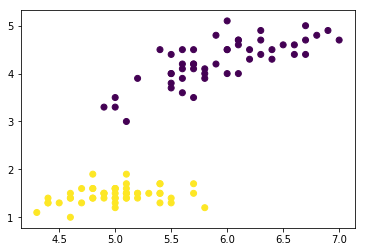

In [92]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 2], c=y)

In [93]:
y2 = np.where(data2[4] == 'Iris-versicolor', 1, -1)

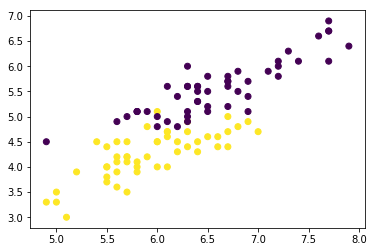

In [94]:
plt.scatter(data2.iloc[:, 0], data2.iloc[:, 2], c=y2)

# 1980s 신경망

In [95]:
def step(x):
    y = np.where(x > 0, 1, -1)
    return y

In [96]:
x = np.arange(-5, 5, 0.1)

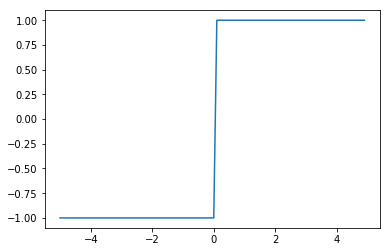

In [97]:
plt.plot(x, step(x))

In [98]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

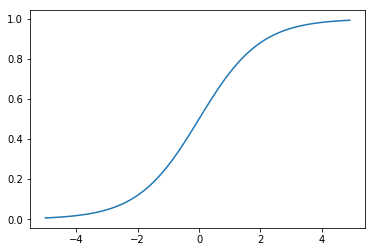

In [99]:
plt.plot(x, sigmoid(x))

In [100]:
X = np.array([[1., 0.5]])

In [101]:
W1 = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])
W1

array([[ 0.1,  0.2,  0.3],
       [ 0.4,  0.5,  0.6]])

In [102]:
b1 = np.array([0.1, 0.2, 0.3])

In [103]:
z1 = np.dot(X, W1) + b1
z1

array([[ 0.4 ,  0.65,  0.9 ]])

In [105]:
a1 = sigmoid(z1)
a1

array([[ 0.59868766,  0.65701046,  0.7109495 ]])

In [106]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
W2

array([[ 0.1,  0.4],
       [ 0.2,  0.5],
       [ 0.3,  0.6]])

In [107]:
b2 = np.array([0.1, 0.2])

In [108]:
z2 = np.dot(a1, W2) + b2
z2

array([[ 0.50455571,  1.19455   ]])

In [109]:
a2 = sigmoid(z2)
a2

array([[ 0.62352934,  0.76755384]])

In [110]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
W3

array([[ 0.1,  0.3],
       [ 0.2,  0.4]])

In [111]:
b3 = np.array([0.1, 0.2])

In [112]:
z3 = np.dot(a2, W3) + b3
z3

array([[ 0.3158637 ,  0.69408034]])

출력 처리

In [116]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    y = exp_a / np.sum(exp_a)
    return y

In [120]:
a = np.array([-0.3, 2.9, 4.0])

In [121]:
y = softmax(a)
y

array([ 0.01007736,  0.24722318,  0.74269946])

In [119]:
np.sum(y)

1.0